<a href="https://colab.research.google.com/github/KIQVinicius/Data-Science/blob/master/LP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install country-converter
!pip install pycountry-convert
!pip install tpot

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import seaborn as sns
import country_converter as coco
import pycountry_convert as pycoco


In [113]:
def KMeansOtimization(num_clusters, classe):
  model = KMeans(n_clusters = num_clusters)
  model.fit(classe)
  return [num_clusters, model.inertia_]

In [114]:
data = pd.read_csv('/content/drive/My Drive/LP4/data-final.csv', sep = "\t", nrows = 100000)
#data_final = data_final.head(10000)
data.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768,1024,9,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360,768,12,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366,768,3,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920,1200,186,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366,768,8,315.0,17,2,KE,1.0,38.0


In [115]:
data.dropna(inplace=True)

In [116]:
iso2 = list(data["country"].unique())

unknown_iso2 = ["NONE", "SX", "TL", "AQ"]

iso3 = coco.convert(names = iso2, to = "ISO3")
continent = pd.Series(iso2)[~pd.Series(iso2).isin(unknown_iso2)]
list_continent=[]
for i in continent:
  list_continent.append(pycoco.country_alpha2_to_continent_code(i))
continent = pd.Series(list_continent)
short_name = coco.convert(names = iso2, to = "name_short")
continent = pd.Series(list_continent)
dict_continent_name = {
    'NA': 1, #'North America'
    'SA': 2,#'South America', 
    'AS': 3,#'Asia',
    'OC': 4,#'Oceania',
    'EU': 5,#'Europe',
    'AF': 6 #'Africa'
}

continent = continent.replace(dict_continent_name)
dict_country = dict(zip(iso2, iso3))
dict_short_name = dict(zip(iso3, short_name))
dict_continent = dict(zip(iso2, continent))

data["country_iso2"] = data["country"].replace(dict_country)
data["country_iso3"] = data["country"].replace(dict_country)
data["country_name"] = data["country_iso3"].replace(dict_short_name)
data["continent"] = data["country"].replace(dict_continent)


In [117]:
frequency = pd.DataFrame(data['country_name'].value_counts())
frequency.reset_index(inplace=True)
frequency.columns = ['country_name', 'Frequencia']
frequency = frequency.query("Frequencia > 1000")
data = data[data['country_name'].isin(frequency['country_name'])]
data = data.query("country_name != 'not found'")
#x = data[['EXT1',	'EXT2',	'EXT3',	'EXT4',	'EXT5',	'EXT6',	'EXT7',	'EXT8',	'EXT9',	'EXT10',	'EST1',	'EST2',	'EST3',	'EST4',	'EST5',	'EST6',	'EST7',	'EST8',	'EST9',	'EST10',	'AGR1',	'AGR2',	'AGR3',	'AGR4',	'AGR5',	'AGR6',	'AGR7',	'AGR8',	'AGR9',	'AGR10',	'CSN1',	'CSN2',	'CSN3',	'CSN4',	'CSN5',	'CSN6',	'CSN7',	'CSN8',	'CSN9',	'CSN10','OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']]


In [118]:
x = data[['EXT1',	'EST1',	'AGR1',	'CSN1',	'OPN1',	'EXT2',	'EST2',	'AGR2',	'CSN2',	'OPN2']]
y = data['country_name']
list_classes = y.unique()
data['country_name'].value_counts()

United States     53676
United Kingdom     7165
Canada             5799
Australia          5430
India              2519
Philippines        1902
New Zealand        1429
Germany            1352
Netherlands        1322
Sweden             1253
Malaysia           1162
Name: country_name, dtype: int64

In [119]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [120]:
#scaler = StandardScaler()
#scaled_x = scaler.fit_transform(x)
#scaled_x = pd.DataFrame(scaled_x, columns=x.columns)
scaled_x = x

In [121]:
#result = [KMeansOtimization(clusters,scaled_x) for clusters in range(1, 20)]

In [122]:
#result = pd.DataFrame(result,columns=['Cluster', 'Erro'])

In [123]:
#result['Erro'].plot(xticks =result['Cluster'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44ad72c0f0>,
      dtype=object)

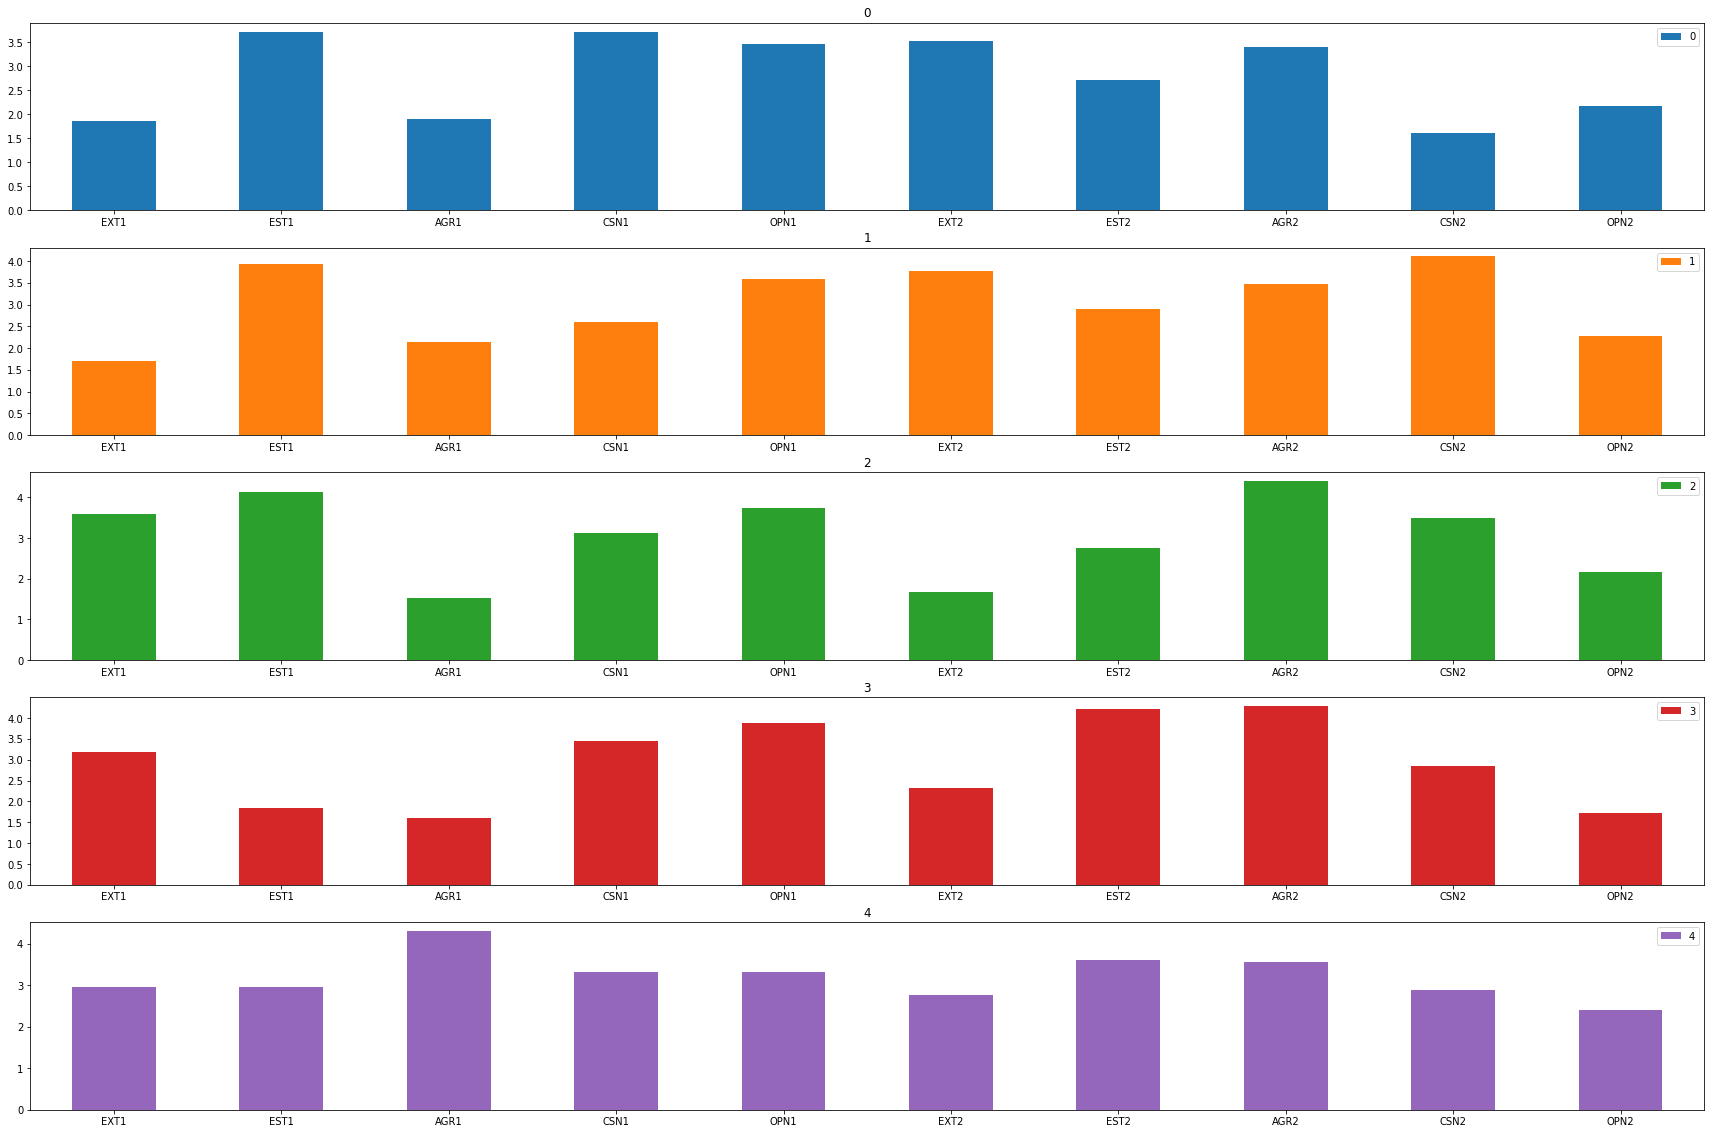

In [124]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_x)
groups = pd.DataFrame(kmeans.cluster_centers_, columns = scaled_x.columns)
groups = groups.transpose()
groups.plot.bar(subplots = True, figsize = (30, 20), sharex =False ,rot = 0 )




In [125]:
scaled_x['continent'] = data['continent']
scaled_x['Cluster'] =kmeans.labels_


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
scaled_x.dropna(inplace=True)
y = y.loc[scaled_x.index]
print(y.shape)
print(scaled_x.shape)

(83009,)
(83009, 12)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'color_list': ['g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'b'],
 'dcoord': [[0.0, 0.8200222915426983, 0.8200222915426983, 0.0],
  [0.0, 1.2678369982337148, 1.2678369982337148, 0.8200222915426983],
  [0.0, 1.3986368453563391, 1.3986368453563391, 1.2678369982337148],
  [0.0, 2.0797828756871506, 2.0797828756871506, 1.3986368453563391],
  [0.0, 2.1446445118134667, 2.1446445118134667, 2.0797828756871506],
  [0.0, 2.0229435354467458, 2.0229435354467458, 0.0],
  [0.0, 2.176671340861585, 2.176671340861585, 2.0229435354467458],
  [2.1446445118134667,
   2.212138647233701,
   2.212138647233701,
   2.176671340861585],
  [0.0, 2.2393008425008825, 2.2393008425008825, 2.212138647233701]],
 'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [15.0, 15.0, 34.375, 34.375],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [24.6875, 24.6875, 82.5, 82.5],
  [5.0, 5.0, 53.59375, 53.59375]],
 'ivl': ['8', '1', '0', '6', '3', '4'

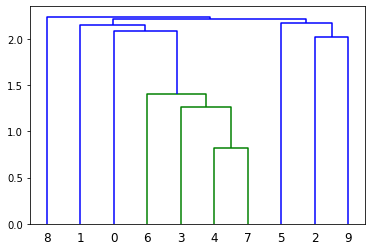

In [128]:
matriz_de_distancia = linkage(groups)
dendrogram(matriz_de_distancia)

In [129]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [130]:
#visualizacao = tsne.fit_transform(scaled_x)
#visualizacao

In [131]:
#sns.set(rc={'figure.figsize': (13, 13)})
#sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue =kmeans.labels_, palette=sns.color_palette('Set1', 4) )

In [132]:
#x['continent'] = pd.to_numeric(x['continent'])
scaled_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83009 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EXT1       83009 non-null  float64
 1   EST1       83009 non-null  float64
 2   AGR1       83009 non-null  float64
 3   CSN1       83009 non-null  float64
 4   OPN1       83009 non-null  float64
 5   EXT2       83009 non-null  float64
 6   EST2       83009 non-null  float64
 7   AGR2       83009 non-null  float64
 8   CSN2       83009 non-null  float64
 9   OPN2       83009 non-null  float64
 10  continent  83009 non-null  object 
 11  Cluster    83009 non-null  int32  
dtypes: float64(10), int32(1), object(1)
memory usage: 7.9+ MB


In [133]:
corr = scaled_x.corr()
corr

,EXT1,EST1,AGR1,CSN1,OPN1,EXT2,EST2,AGR2,CSN2,OPN2,Cluster
EXT1,1.000000,-0.081568,-0.012099,0.030095,0.039724,-0.446363,0.133608,0.264783,0.058126,-0.011894,0.417181
EST1,-0.081568,1.000000,-0.031320,-0.031512,-0.009930,0.059017,-0.448098,-0.006324,0.091423,0.165723,-0.389202
AGR1,-0.012099,-0.031320,1.000000,-0.013905,-0.069777,0.118431,0.049325,-0.232385,-0.003007,0.104772,0.410675
CSN1,0.030095,-0.031512,-0.013905,1.000000,0.111784,0.020712,0.050168,0.071252,-0.272890,-0.035488,-0.002282
OPN1,0.039724,-0.009930,-0.069777,0.111784,1.000000,-0.016138,0.033697,0.097558,0.078121,-0.273150,0.007842
EXT2,-0.446363,0.059017,0.118431,0.020712,-0.016138,1.000000,0.003606,-0.248420,-0.043870,0.062043,-0.326007
EST2,0.133608,-0.448098,0.049325,0.050168,0.033697,0.003606,1.000000,0.108447,0.046294,-0.056884,0.366666
AGR2,0.264783,-0.006324,-0.232385,0.071252,0.097558,-0.248420,0.108447,1.000000,0.091414,-0.047924,0.148726
CSN2,0.058126,0.091423,-0.003007,-0.272890,0.078121,-0.043870,0.046294,0.091414,1.000000,0.020388,0.146622
OPN2,-0.011894,0.165723,0.104772,-0.035488,-0.273150,0.062043,-0.056884,-0.047924,0.020388,1.000000,-0.024158


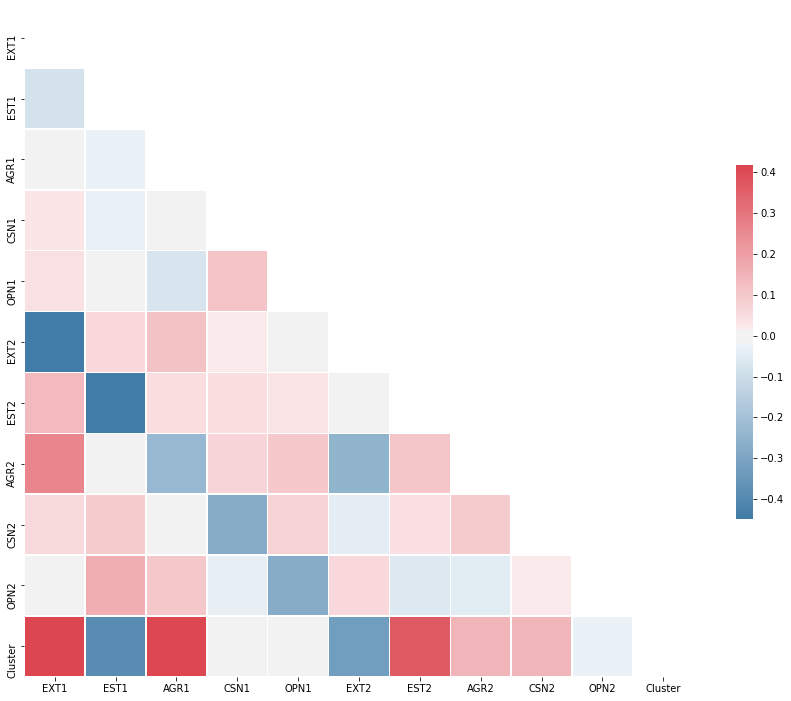

In [134]:
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  f, ax = plt.subplots(figsize=(15, 13))
  cmap = sns.diverging_palette(240, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [135]:
#raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
#                                                         test_size = 0.25,
#                                                         stratify = y)
#
#print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))
#
#modelo = TPOTClassifier(verbosity = 2, generations=5, n_jobs=-1, config_dict="TPOT light")
#modelo.fit(raw_treino_x, treino_y)

In [136]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(scaled_x, y,
                                                         test_size = 0.25,
                                                         stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(raw_treino_x, treino_y)
previsoes_SVC = modelo.predict(raw_teste_x)
acuracia = accuracy_score(teste_y, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

    
dot_data = export_graphviz(modelo, out_file=None,  feature_names = scaled_x.columns, filled=True, rounded=True, class_names=list_classes )
grafico = graphviz.Source(dot_data)

Treinaremos com 62256 elementos e testaremos com 20753 elementos
A acurácia foi 82.98%


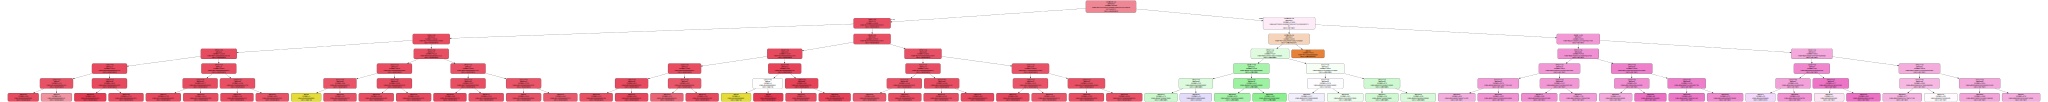

In [137]:
grafico

In [138]:
pred = modelo.predict([[5,5,5,5,1,1,1,1,1,5,5, 1]])
print("Previsão: "+ pred[0])

Previsão: United Kingdom


In [140]:
centr = kmeans.predict([[1,1,1,1,1,1,1,1,1,1]])
print("Centroide: "+ str(centr[0]))

Centroide: 0
